In [1]:
from GHZ import GHZ_Experiment
from selene_sim import DepolarizingErrorModel, Quest

In [6]:
# select parameters and build experiment

n_qubits = 10
filename = 'exp_GHZ_example.p'

exp = GHZ_Experiment(n_qubits, filename=filename)
exp.add_settings()

In [3]:
# setup error model

error_model = DepolarizingErrorModel(
    #random_seed=1234,
    # single qubit gate error rate
    p_1q=4e-3,
    # two qubit gate error rate
    p_2q=1e-3,
    # set state preparation and measurement error rates to 0
    p_meas=0,
    p_init=0,
)

In [4]:
# simulate experiment

shots = 100
simulator = Quest()

exp.sim(shots, error_model=error_model, simulator=simulator)

Simulating ...
1/20 circuits complete
2/20 circuits complete
3/20 circuits complete
4/20 circuits complete
5/20 circuits complete
6/20 circuits complete
7/20 circuits complete
8/20 circuits complete
9/20 circuits complete
10/20 circuits complete
11/20 circuits complete
12/20 circuits complete
13/20 circuits complete
14/20 circuits complete
15/20 circuits complete
16/20 circuits complete
17/20 circuits complete
18/20 circuits complete
19/20 circuits complete
20/20 circuits complete


GHZ n=10 Fidelity = 0.9135 +/- 0.0112



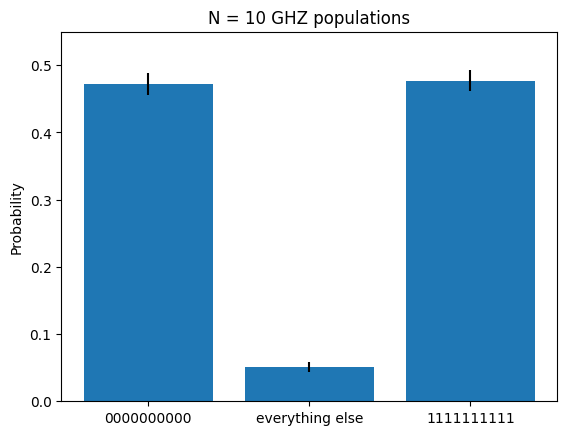

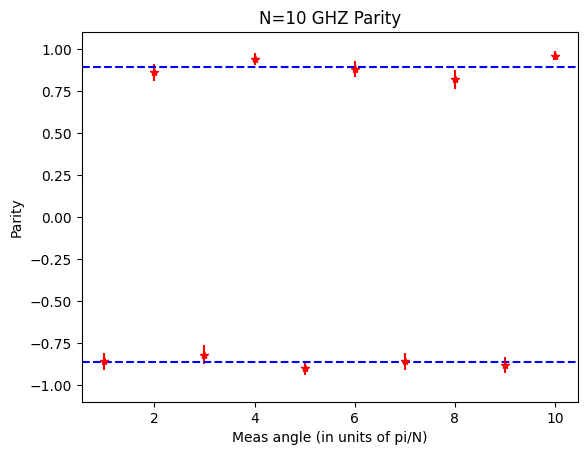

In [5]:
exp.analyze_results()

In [ ]:
# save experiment object to working directory

exp.save()